In [3]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict,Literal

In [4]:
class quadraticParams(TypedDict):
    a: float
    b: float
    c: float
    eq_type: str  # 'real' or 'complex'
    discriminant: float
    results: str

In [5]:
def showequation(params: quadraticParams):
    return {'equation': f"{params['a']}x^2 + {params['b']}x + {params['c']} = 0"}
def calculate_discriminant(params: quadraticParams):
    a = params['a']
    b = params['b']
    c = params['c']
    discriminant = b**2 - 4*a*c
    return {'discriminant': discriminant}

def real_roots(params: quadraticParams):
    import math
    a = params['a']
    b = params['b']
    discriminant = params['discriminant']
    root1 = (-b + math.sqrt(discriminant)) / (2*a)
    root2 = (-b - math.sqrt(discriminant)) / (2*a)
    return {'results': f"Real roots: {root1}, {root2}"}
def complex_roots(params: quadraticParams):
    a = params['a']
    b = params['b']
    discriminant = params['discriminant']
    real_part = -b / (2*a)
    imaginary_part = (abs(discriminant)**0.5) / (2*a)
    root1 = f"{real_part} + {imaginary_part}i"
    root2 = f"{real_part} - {imaginary_part}i"
    return {'results': f"Complex roots: {root1}, {root2}"}

def repeated_root(params: quadraticParams):
    a = params['a']
    b = params['b']
    root = -b / (2*a)
    return {'results': f"Repeated root: {root}"}

def check_condition(params: quadraticParams)->Literal["real_roots","complex_roots","repeated_root"]:
    discriminant = params['discriminant']
    if discriminant > 0:
        return "real_roots"
    elif discriminant < 0:
        return "complex_roots"
    else:
        return "repeated_root"
    

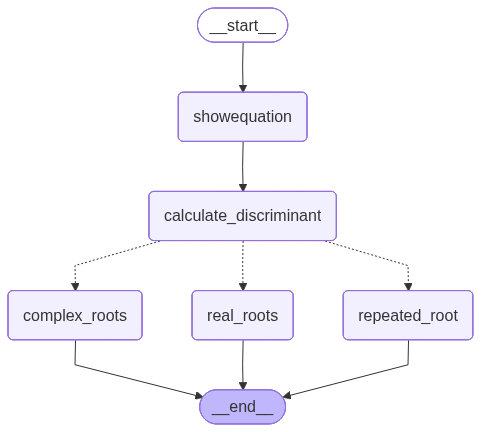

In [7]:
graph=StateGraph(quadraticParams)
graph.add_node("showequation",showequation)
graph.add_node("calculate_discriminant",calculate_discriminant)
graph.add_node("real_roots",real_roots)
graph.add_node("complex_roots",complex_roots)
graph.add_node("repeated_root",repeated_root)


graph.add_edge(START,"showequation")
graph.add_edge("showequation","calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant",check_condition)
graph.add_edge("real_roots",END)
graph.add_edge("complex_roots",END)
graph.add_edge("repeated_root",END)
graph.compile()